In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet

In [2]:
train_set = pd.read_csv('train.csv')
train_set['중앙값'] = train_set[['최고기온','최저기온']].median(axis=1)
sub_set = pd.read_csv('sample_submission.csv')

for col in ['일조합', '일조율', '일사합', '평균풍속', '강수량']:
    if col == '강수량':
        train_set[col] = train_set[col].fillna(0)
    else:
        train_set[col] = train_set[col].fillna(train_set[col].mean())
        
train_set.fillna(method='ffill', inplace=True)

In [3]:
k = pd.DataFrame(columns=['일시'], data=[['2023-12-25'],
                                           ['2023-12-26'],
                                           ['2023-12-27'],
                                           ['2023-12-28'],
                                           ['2023-12-29'],
                                           ['2023-12-30'],
                                           ['2023-12-31']])

sub_set = pd.concat([sub_set[['일시']],k])
k = sub_set.copy()


#2011년부터 생성
s_idx = train_set[train_set.일시=='2011-01-01'].index[0]
sub_set = train_set[s_idx:]
train_set = train_set[:s_idx]

sub_set = pd.concat([sub_set,k]).reset_index(drop=True)[['일시']]

In [4]:
#Prophet 학습 데이터 생성
def make_prophet_trainset(data):
    col_list = ['일시', '최고기온', '최저기온', '중앙값', '평균기온', '평균습도', '일조합', '일조율', '일사합', '평균풍속', '강수량']
    return data[col_list]

In [5]:
#Prophet 결과 저장 데이터프레임
mk_dataset = pd.DataFrame()

#Prophet add regressor 컬럼 저장
add_col_list = []

+ 최고기온

In [ ]:
ts_1_x = make_prophet_trainset(train_set)
ts_1_x.rename(columns={'일시':'ds', '최고기온':'y'}, inplace=True)
ts_1_y = sub_set.rename(columns={'일시':'ds'}).reset_index(drop=True)

prophet = Prophet(yearly_seasonality=True, 
                  n_changepoints=100,
                  changepoint_prior_scale=0.05)
prophet.fit(ts_1_x)

result = prophet.predict(ts_1_y)
re_temp = result.drop(['ds', 
             'multiplicative_terms', 
             'multiplicative_terms', 
             'multiplicative_terms_upper']
             ,axis=1)

for col in list(re_temp):
    mk_dataset['최고기온_'+col] = result[col]

add_col_list.append('최고기온')

+ 최저기온

In [ ]:
ts_1_x = make_prophet_trainset(train_set)
ts_1_x.rename(columns={'일시':'ds', '최저기온':'y'}, inplace=True)
ts_1_y = sub_set.rename(columns={'일시':'ds'}).reset_index(drop=True)

prophet = Prophet(yearly_seasonality=True, 
                  n_changepoints=100,
                  changepoint_prior_scale=0.05)

for add_reg in add_col_list:
    prophet.add_regressor(add_reg)
    
prophet.fit(ts_1_x)

for add_reg in add_col_list:
    ts_1_y[add_reg] = mk_dataset[f'{add_reg}_yhat']

result = prophet.predict(ts_1_y)
re_temp = result.drop(['ds', 
             'multiplicative_terms', 
             'multiplicative_terms', 
             'multiplicative_terms_upper']
             ,axis=1)

for col in list(re_temp):
    mk_dataset['최저기온_'+col] = result[col]
    
add_col_list.append('최저기온')

+ 중앙값

In [ ]:
ts_1_x = make_prophet_trainset(train_set)
ts_1_x.rename(columns={'일시':'ds', '중앙값':'y'}, inplace=True)
ts_1_y = sub_set.rename(columns={'일시':'ds'}).reset_index(drop=True)

prophet = Prophet(yearly_seasonality=True, 
                  n_changepoints=100,
                  changepoint_prior_scale=0.05)

for add_reg in add_col_list:
    prophet.add_regressor(add_reg)

prophet.fit(ts_1_x)

for add_reg in add_col_list:
    ts_1_y[add_reg] = mk_dataset[f'{add_reg}_yhat']
    
result = prophet.predict(ts_1_y)
re_temp = result.drop(['ds', 
             'multiplicative_terms', 
             'multiplicative_terms', 
             'multiplicative_terms_upper']
             ,axis=1)

for col in list(re_temp):
    mk_dataset['중앙값_'+col] = result[col]

add_col_list.append('중앙값')

+ 평균기온

In [ ]:
ts_1_x = make_prophet_trainset(train_set)
ts_1_x.rename(columns={'일시':'ds', '평균기온':'y'}, inplace=True)
ts_1_y = sub_set.rename(columns={'일시':'ds'}).reset_index(drop=True)

prophet = Prophet(yearly_seasonality=True, 
                  n_changepoints=100,
                  changepoint_prior_scale=0.05)

for add_reg in add_col_list:
    prophet.add_regressor(add_reg)

prophet.fit(ts_1_x)

for add_reg in add_col_list:
    ts_1_y[add_reg] = mk_dataset[f'{add_reg}_yhat']
    
result = prophet.predict(ts_1_y)
re_temp = result.drop(['ds', 
             'multiplicative_terms', 
             'multiplicative_terms', 
             'multiplicative_terms_upper']
             ,axis=1)

for col in list(re_temp):
    mk_dataset['평균기온_'+col] = result[col]

add_col_list.append('평균기온')

+ 평균습도

In [ ]:
ts_1_x = make_prophet_trainset(train_set)
ts_1_x.rename(columns={'일시':'ds', '평균습도':'y'}, inplace=True)
ts_1_y = sub_set.rename(columns={'일시':'ds'}).reset_index(drop=True)

prophet = Prophet(yearly_seasonality=True, 
                  n_changepoints=100,
                  changepoint_prior_scale=0.05)

for add_reg in add_col_list:
    prophet.add_regressor(add_reg)

prophet.fit(ts_1_x)

for add_reg in add_col_list:
    ts_1_y[add_reg] = mk_dataset[f'{add_reg}_yhat']
    
result = prophet.predict(ts_1_y)
re_temp = result.drop(['ds', 
             'multiplicative_terms', 
             'multiplicative_terms', 
             'multiplicative_terms_upper']
             ,axis=1)

for col in list(re_temp):
    mk_dataset['평균습도_'+col] = result[col]

add_col_list.append('평균습도')

+ 일조합

In [ ]:
ts_1_x = make_prophet_trainset(train_set)
ts_1_x.rename(columns={'일시':'ds', '일조합':'y'}, inplace=True)
ts_1_y = sub_set.rename(columns={'일시':'ds'}).reset_index(drop=True)

prophet = Prophet(yearly_seasonality=True, 
                  n_changepoints=100,
                  changepoint_prior_scale=0.05)

for add_reg in add_col_list:
    prophet.add_regressor(add_reg)

prophet.fit(ts_1_x)

for add_reg in add_col_list:
    ts_1_y[add_reg] = mk_dataset[f'{add_reg}_yhat']
    
result = prophet.predict(ts_1_y)
re_temp = result.drop(['ds', 
             'multiplicative_terms', 
             'multiplicative_terms', 
             'multiplicative_terms_upper']
             ,axis=1)

for col in list(re_temp):
    mk_dataset['일조합_'+col] = result[col]

add_col_list.append('일조합')

+ 일조율

In [ ]:
ts_1_x = make_prophet_trainset(train_set)
ts_1_x.rename(columns={'일시':'ds', '일조율':'y'}, inplace=True)
ts_1_y = sub_set.rename(columns={'일시':'ds'}).reset_index(drop=True)

prophet = Prophet(yearly_seasonality=True, 
                  n_changepoints=100,
                  changepoint_prior_scale=0.05)

for add_reg in add_col_list:
    prophet.add_regressor(add_reg)

prophet.fit(ts_1_x)

for add_reg in add_col_list:
    ts_1_y[add_reg] = mk_dataset[f'{add_reg}_yhat']
    
result = prophet.predict(ts_1_y)
re_temp = result.drop(['ds', 
             'multiplicative_terms', 
             'multiplicative_terms', 
             'multiplicative_terms_upper']
             ,axis=1)

for col in list(re_temp):
    mk_dataset['일조율_'+col] = result[col]

add_col_list.append('일조율')

+ 일사합

In [ ]:
ts_1_x = make_prophet_trainset(train_set)
ts_1_x.rename(columns={'일시':'ds', '일사합':'y'}, inplace=True)
ts_1_y = sub_set.rename(columns={'일시':'ds'}).reset_index(drop=True)

prophet = Prophet(yearly_seasonality=True, 
                  n_changepoints=100,
                  changepoint_prior_scale=0.05)

for add_reg in add_col_list:
    prophet.add_regressor(add_reg)

prophet.fit(ts_1_x)

for add_reg in add_col_list:
    ts_1_y[add_reg] = mk_dataset[f'{add_reg}_yhat']
    
result = prophet.predict(ts_1_y)
re_temp = result.drop(['ds', 
             'multiplicative_terms', 
             'multiplicative_terms', 
             'multiplicative_terms_upper']
             ,axis=1)

for col in list(re_temp):
    mk_dataset['일사합_'+col] = result[col]

add_col_list.append('일사합')

+ 평균풍속

In [ ]:
ts_1_x = make_prophet_trainset(train_set)
ts_1_x.rename(columns={'일시':'ds', '평균풍속':'y'}, inplace=True)
ts_1_y = sub_set.rename(columns={'일시':'ds'}).reset_index(drop=True)

prophet = Prophet(yearly_seasonality=True, 
                  n_changepoints=100,
                  changepoint_prior_scale=0.05)

for add_reg in add_col_list:
    prophet.add_regressor(add_reg)

prophet.fit(ts_1_x)

for add_reg in add_col_list:
    ts_1_y[add_reg] = mk_dataset[f'{add_reg}_yhat']
    
result = prophet.predict(ts_1_y)
re_temp = result.drop(['ds', 
             'multiplicative_terms', 
             'multiplicative_terms', 
             'multiplicative_terms_upper']
             ,axis=1)

for col in list(re_temp):
    mk_dataset['평균풍속_'+col] = result[col]

add_col_list.append('평균풍속')

+ 강수량

In [ ]:
ts_1_x = make_prophet_trainset(train_set)
ts_1_x.rename(columns={'일시':'ds', '강수량':'y'}, inplace=True)
ts_1_y = sub_set.rename(columns={'일시':'ds'}).reset_index(drop=True)

prophet = Prophet(yearly_seasonality=True, 
                  n_changepoints=100,
                  changepoint_prior_scale=0.05)

for add_reg in add_col_list:
    prophet.add_regressor(add_reg)

prophet.fit(ts_1_x)

for add_reg in add_col_list:
    ts_1_y[add_reg] = mk_dataset[f'{add_reg}_yhat']
    
result = prophet.predict(ts_1_y)
re_temp = result.drop(['ds', 
             'multiplicative_terms', 
             'multiplicative_terms', 
             'multiplicative_terms_upper']
             ,axis=1)

for col in list(re_temp):
    mk_dataset['강수량_'+col] = result[col]

add_col_list.append('강수량')

In [16]:
mk_dataset.head()

,최고기온_trend,최고기온_yhat_lower,최고기온_yhat_upper,최고기온_trend_lower,최고기온_trend_upper,최고기온_additive_terms,최고기온_additive_terms_lower,최고기온_additive_terms_upper,최고기온_weekly,최고기온_weekly_lower,...,강수량_평균기온_lower,강수량_평균기온_upper,강수량_평균습도,강수량_평균습도_lower,강수량_평균습도_upper,강수량_평균풍속,강수량_평균풍속_lower,강수량_평균풍속_upper,강수량_multiplicative_terms_lower,강수량_yhat
0,16.850012,-3.194357,6.737906,16.850012,16.850012,-15.061997,-15.061997,-15.061997,-0.000652,-0.000652,...,-15.572089,-15.572089,-2.426929,-2.426929,-2.426929,0.152625,0.152625,0.152625,0.0,1.423262
1,16.849833,-3.079452,6.401717,16.849833,16.849833,-15.153790,-15.153790,-15.153790,0.004046,0.004046,...,-15.743476,-15.743476,-2.385996,-2.385996,-2.385996,0.136271,0.136271,0.136271,0.0,1.384616
2,16.849653,-3.548791,6.130242,16.849653,16.849653,-15.262710,-15.262710,-15.262710,-0.013241,-0.013241,...,-15.845266,-15.845266,-2.466514,-2.466514,-2.466514,0.171491,0.171491,0.171491,0.0,0.905604
3,16.849474,-3.042524,6.037068,16.849474,16.849474,-15.328556,-15.328556,-15.328556,0.007504,0.007504,...,-15.954937,-15.954937,-2.518298,-2.518298,-2.518298,0.179697,0.179697,0.179697,0.0,1.216557
4,16.849295,-3.398287,6.037628,16.849295,16.849295,-15.424201,-15.424201,-15.424201,-0.006776,-0.006776,...,-16.033361,-16.033361,-2.487401,-2.487401,-2.487401,0.165787,0.165787,0.165787,0.0,1.022379


In [17]:
mk_dataset.shape

(4748, 322)

In [18]:
train_set = pd.read_csv('train.csv')
train_set['중앙값'] = train_set[['최고기온','최저기온']].median(axis=1)

train_x = mk_dataset[:-365].values
train_y = train_set[train_set.shape[0] - mk_dataset[:-365].shape[0]:].평균기온

k=pd.concat([pd.DataFrame(train_x),pd.DataFrame(train_y).reset_index(drop=True)],axis=1).corr()['평균기온'].values
check=pd.DataFrame(index=list(mk_dataset), data=k[:k.shape[0]-1])
n_mk_dataset = mk_dataset[check[check[0]>0.6].index.tolist() + check[check[0]<-0.6].index.tolist()]

In [22]:
#피어슨 상관계수 0.6 이상 컬럼 사용
n_mk_dataset.head()

,최고기온_yhat_lower,최고기온_yhat_upper,최고기온_additive_terms,최고기온_additive_terms_lower,최고기온_additive_terms_upper,최고기온_yearly,최고기온_yearly_lower,최고기온_yearly_upper,최고기온_yhat,최저기온_yhat_lower,...,강수량_일사합_upper,강수량_중앙값,강수량_중앙값_lower,강수량_중앙값_upper,강수량_최고기온,강수량_최고기온_lower,강수량_최고기온_upper,강수량_최저기온,강수량_최저기온_lower,강수량_최저기온_upper
0,-3.194357,6.737906,-15.061997,-15.061997,-15.061997,-15.061345,-15.061345,-15.061345,1.788015,-7.658008,...,1.844436,7.386982,7.386982,7.386982,11.028959,11.028959,11.028959,3.786783,3.786783,3.786783
1,-3.079452,6.401717,-15.153790,-15.153790,-15.153790,-15.157836,-15.157836,-15.157836,1.696042,-7.816366,...,1.649677,7.462043,7.462043,7.462043,11.096200,11.096200,11.096200,3.842862,3.842862,3.842862
2,-3.548791,6.130242,-15.262710,-15.262710,-15.262710,-15.249469,-15.249469,-15.249469,1.586943,-8.182849,...,1.700846,7.516845,7.516845,7.516845,11.175962,11.175962,11.175962,3.871761,3.871761,3.871761
3,-3.042524,6.037068,-15.328556,-15.328556,-15.328556,-15.336060,-15.336060,-15.336060,1.520918,-8.254886,...,1.640543,7.563549,7.563549,7.563549,11.224233,11.224233,11.224233,3.904127,3.904127,3.904127
4,-3.398287,6.037628,-15.424201,-15.424201,-15.424201,-15.417425,-15.417425,-15.417425,1.425094,-8.291027,...,1.726938,7.608367,7.608367,7.608367,11.294289,11.294289,11.294289,3.925866,3.925866,3.925866


In [ ]:
train_x = n_mk_dataset[:-365].values
train_y = train_set[train_set.shape[0] - n_mk_dataset[:-365].shape[0]:].평균기온

test_x = n_mk_dataset[-365:].values

In [19]:
train_x = train_x.reshape(train_x.shape[0],1,train_x.shape[1])
test_x = test_x.reshape(test_x.shape[0],1,test_x.shape[1])

In [20]:
print("train_x shape : ", train_x.shape)
print("test_x shape : ", test_x.shape)

train_x shape :  (4383, 1, 201)
test_x shape :  (365, 1, 201)


In [23]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
import gc

In [24]:
gc.collect()
K.clear_session()
input_shape = (train_x.shape[1],)
lstm_model = tf.keras.Sequential([
    layers.Input(shape=(1,train_x.shape[2])),
    layers.LSTM(128, activation='relu', return_sequences=True),
    layers.GroupNormalization(groups=2),
    layers.LSTM(16, activation='relu', return_sequences=True),
    layers.GroupNormalization(groups=2),
    layers.LSTM(4, activation='relu', return_sequences=False),
    layers.GroupNormalization(groups=2),
    layers.Dense(1)
])

rmsprop = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.005)

lstm_model.compile(optimizer = rmsprop,
                  loss = 'mae', metrics=[tf.keras.metrics.MeanAbsoluteError()])

lstm_model.summary()

early_stop = EarlyStopping(monitor = 'loss', patience = 20, verbose = 1, 
                           min_delta = 0.0002, restore_best_weights=True,
                          baseline=None)

checkpoint = ModelCheckpoint("weights.h5", monitor='loss', verbose=1, save_best_only=True, mode='min', save_weights_only=True)

history = lstm_model.fit(train_x, train_y, 
                         batch_size=64, 
                         epochs=300,
                         callbacks=[early_stop, checkpoint], 
                         verbose=1, 
                         shuffle=True)

2024-01-05 19:08:56.279136: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-01-05 19:08:56.279159: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-01-05 19:08:56.279166: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-01-05 19:08:56.279200: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-05 19:08:56.279214: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            168960    
                                                                 
 group_normalization (Group  (None, 1, 128)            256       
 Normalization)                                                  
                                                                 
 lstm_1 (LSTM)               (None, 1, 16)             9280      
                                                                 
 group_normalization_1 (Gro  (None, 1, 16)             32        
 upNormalization)                                                
                                                                 
 lstm_2 (LSTM)               (None, 4)                 336       
                                                                 
 group_normalization_2 (Gro  (None, 4)                 8

2024-01-05 19:08:57.411977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - ETA: 0s - loss: 12.1956 - mean_absolute_error: 12.1956
Epoch 1: loss improved from inf to 12.19558, saving model to weights.h5
69/69 [==============================] - 5s 42ms/step - loss: 12.1956 - mean_absolute_error: 12.1956
Epoch 2/300
69/69 [==============================] - ETA: 0s - loss: 9.7450 - mean_absolute_error: 9.7450
Epoch 2: loss improved from 12.19558 to 9.74501, saving model to weights.h5
69/69 [==============================] - 2s 35ms/step - loss: 9.7450 - mean_absolute_error: 9.7450
Epoch 3/300
69/69 [==============================] - ETA: 0s - loss: 7.1433 - mean_absolute_error: 7.1433
Epoch 3: loss improved from 9.74501 to 7.14331, saving model to weights.h5
69/69 [==============================] - 2s 36ms/step - loss: 7.1433 - mean_absolute_error: 7.1433
Epoch 4/300
69/69 [==============================] - ETA: 0s - loss: 5.2488 - mean_absolute_error: 5.2488
Epoch 4: loss improved from 7.14331 to 5.24876, saving model to 

In [25]:
lstm_model.load_weights('./weights.h5')

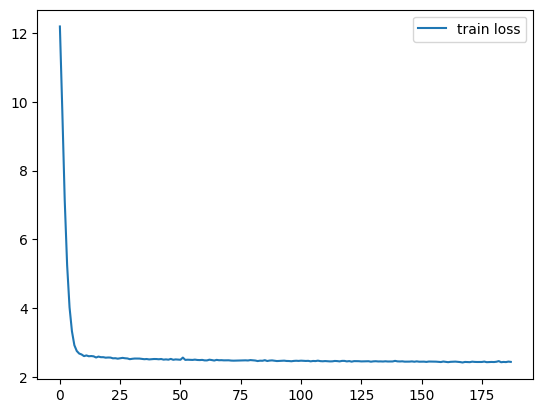

In [26]:
import matplotlib.pyplot as plt
epoch_len = len(history.history['loss'])
plt.plot(range(epoch_len), history.history['loss'], label='train loss')

plt.legend()
plt.show()

In [27]:
pred=lstm_model.predict(test_x, batch_size = 1)

2024-01-05 19:16:54.765178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


365/365 [==============================] - 3s 7ms/step


In [28]:
submission = pd.read_csv('sample_submission.csv')
submission['평균기온'] = pred[:358]

In [29]:
submission

,일시,평균기온
0,2023-01-01,-1.416964
1,2023-01-02,-1.564280
2,2023-01-03,-1.560658
3,2023-01-04,-1.657449
4,2023-01-05,-1.612456
...,...,...
353,2023-12-20,-0.136424
354,2023-12-21,-0.184975
355,2023-12-22,-0.468877
356,2023-12-23,-0.625909
